<h1>contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gather-Training-Data" data-toc-modified-id="Gather-Training-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gather Training Data</a></span><ul class="toc-item"><li><span><a href="#positive-examples" data-toc-modified-id="positive-examples-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>positive examples</a></span></li><li><span><a href="#negative-examples" data-toc-modified-id="negative-examples-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>negative examples</a></span></li></ul></li><li><span><a href="#Build-Model-w/-Default-Options" data-toc-modified-id="Build-Model-w/-Default-Options-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Build Model w/ Default Options</a></span><ul class="toc-item"><li><span><a href="#image-metadata" data-toc-modified-id="image-metadata-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>image metadata</a></span></li><li><span><a href="#induce-algorithm" data-toc-modified-id="induce-algorithm-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>induce algorithm</a></span></li></ul></li><li><span><a href="#Test-Model" data-toc-modified-id="Test-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Test Model</a></span><ul class="toc-item"><li><span><a href="#test-image" data-toc-modified-id="test-image-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>test image</a></span></li><li><span><a href="#run-the-model" data-toc-modified-id="run-the-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>run the model</a></span></li><li><span><a href="#results" data-toc-modified-id="results-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>results</a></span></li><li><span><a href="#visualize-results" data-toc-modified-id="visualize-results-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>visualize results</a></span></li></ul></li></ul></div>

# Train A Simple Model

We will train the simplest model with all default options.  
This will work out any kinks left and prove setup is complete.

## Gather Training Data

### positive examples

In [1]:
!ls images/simple/posWinDir/

area.01.png	cubic.01.png	lanczos4.01.png	linear.01.png	nearest.01.png
area.02.png	cubic.02.png	lanczos4.02.png	linear.02.png	nearest.02.png
area.03.png	cubic.03.png	lanczos4.03.png	linear.03.png	nearest.03.png
area.04.png	cubic.04.png	lanczos4.04.png	linear.04.png	nearest.04.png
area.05.png	cubic.05.png	lanczos4.05.png	linear.05.png	nearest.05.png
area.06.png	cubic.06.png	lanczos4.06.png	linear.06.png	nearest.06.png
area.07.png	cubic.07.png	lanczos4.07.png	linear.07.png	nearest.07.png
area.08.png	cubic.08.png	lanczos4.08.png	linear.08.png	nearest.08.png
area.09.png	cubic.09.png	lanczos4.09.png	linear.09.png	nearest.09.png
area.10.png	cubic.10.png	lanczos4.10.png	linear.10.png	nearest.10.png
area.11.png	cubic.11.png	lanczos4.11.png	linear.11.png	nearest.11.png
area.12.png	cubic.12.png	lanczos4.12.png	linear.12.png	nearest.12.png
area.13.png	cubic.13.png	lanczos4.13.png	linear.13.png	nearest.13.png
area.14.png	cubic.14.png	lanczos4.14.png	linear.14.png	nearest.14.png
area.15.png	cubic.15

### negative examples

In [2]:
!ls images/simple/negWinDir/

area.GSD.png		lanczos4.GSD.png	nearest.GSD.png
cubic.GSD.png		linear.GSD.png


## Build Model w/ Default Options

SWITCH TO OCTAVE NOTEBOOK KERNEL

In [3]:
!rm -rf Detector.mat
!rm -rf Log.txt
clc;
clear;
addpath(genpath('octave'));

get training image height and width - needs to be consistent

### image metadata

In [4]:
!sips -g pixelHeight -g pixelWidth images/simple/posWinDir/area.01.png

/Users/Bhill/git/Computer_Vision_Object_Detection/images/simple/posWinDir/area.01.png
  pixelHeight: 20
  pixelWidth: 20


### induce algorithm

In [5]:
opts=acfTrain();
opts.posWinDir = 'images/simple/posWinDir/';
opts.negWinDir = 'images/simple/negWinDir/';
opts.modelDs = [19  19];
opts.modelDsPad = [20  20];
model = acfTrain(opts);

---------------------------------------------------------------------------
Training stage 0
Done sampling windows (time=1s).
Computing lambdas... done (time=0s).
Extracting features... done (time=0s).
Done sampling windows (time=0s).
Extracting features... done (time=0s).
Training AdaBoost: nWeak=128 nFtrs=250 pos=88 neg=3
    binaryTreeTrain at line 114 column 8
    adaBoostTrain at line 79 column 17
    acfTrain at line 200 column 16
    adaBoostTrain at line 84 column 31
    acfTrain at line 200 column 16
    binaryTreeTrain at line 114 column 8
    adaBoostTrain at line 79 column 17
    acfTrain at line 200 column 16
    adaBoostTrain at line 84 column 31
    acfTrain at line 200 column 16
    binaryTreeTrain at line 114 column 8
    adaBoostTrain at line 79 column 17
    acfTrain at line 200 column 16
    adaBoostTrain at line 84 column 31
    acfTrain at line 200 column 16
    binaryTreeTrain at line 114 column 8
    adaBoostTrain at line 79 column 17
    acfTrain at line 200 co

## Test Model 

### test image
![theron](images/theron.png)

In [6]:
image = 'images/theron.png';
I = imread(image);

### run the model 

In [7]:
boundingBoxes = acfDetect(I, model);

modelHt: 20modelWd: 20modelHt: 20modelWd: 20
modelHt: 20modelWd: 20modelHt: 20modelWd: 20


### results

In [30]:
boundingBoxes

boundingBoxes =

   -3.64583   -3.64583   19.79167   19.79167   95.09499
   -3.64583    4.68750   19.79167   19.79167   95.09499
    0.52083    0.52083   19.79167   19.79167   95.09499
    0.52083    8.85417   19.79167   19.79167   95.09499
    4.68750   -3.64583   19.79167   19.79167   95.09499
    4.68750    4.68750   19.79167   19.79167   95.09499
    8.85417    0.52083   19.79167   19.79167   95.09499
    8.85417    8.85417   19.79167   19.79167   95.09499



### visualize results

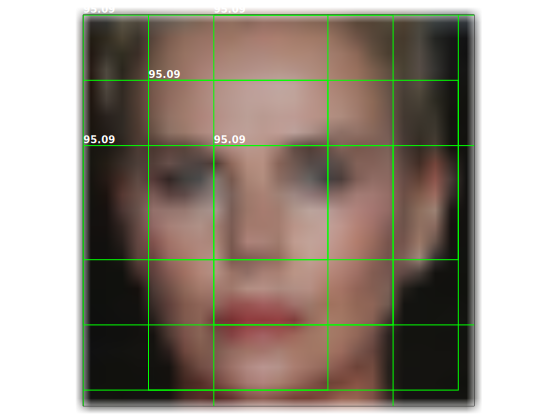

In [55]:
showResOpts = {};
showResOpts.evShow=0;       %   .evShow       - [1] if true show results of evaluation
showResOpts.gtShow=0;       %   .gtShow       - [1] if true show ground truth
showResOpts.dtLs='-';       %   .dtLs         - ['--'] line style for dt bbs
showResOpts.lw=1;           %   .lw           - [3] line width
bbGt( 'showRes', I, [], boundingBoxes, showResOpts);